In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.float_format', '{:.6f}'.format)

In [2]:
df = pd.read_csv('kc_house_data.csv')
df.insert(loc=0, column='ones', value=1) 
df.head()

,ones,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,1,7129300520,20141013T000000,221900.000000,3,1.000000,1180,5650,1.000000,0,...,7,1180,0,1955,0,98178,47.511200,-122.257000,1340,5650
1,1,6414100192,20141209T000000,538000.000000,3,2.250000,2570,7242,2.000000,0,...,7,2170,400,1951,1991,98125,47.721000,-122.319000,1690,7639
2,1,5631500400,20150225T000000,180000.000000,2,1.000000,770,10000,1.000000,0,...,6,770,0,1933,0,98028,47.737900,-122.233000,2720,8062
3,1,2487200875,20141209T000000,604000.000000,4,3.000000,1960,5000,1.000000,0,...,7,1050,910,1965,0,98136,47.520800,-122.393000,1360,5000
4,1,1954400510,20150218T000000,510000.000000,3,2.000000,1680,8080,1.000000,0,...,8,1680,0,1987,0,98074,47.616800,-122.045000,1800,7503


Para este ejercicio se le pide que proporcione un modelo de regresión polinomial que muestre la relación
precio y pies cuadrados del espacio habitable interior de los apartamentos que se muestra en el juego de
datos proporcionado. 

In [3]:
dataset = df[['ones','sqft_living','price']]
dataset.head()

,ones,sqft_living,price
0,1,1180,221900.000000
1,1,2570,538000.000000
2,1,770,180000.000000
3,1,1960,604000.000000
4,1,1680,510000.000000


In [4]:
newdf = dataset.sample(frac=1)
newdf

,ones,sqft_living,price
19820,1,1445,366000.000000
2724,1,1490,390000.000000
12570,1,770,315000.000000
12094,1,3220,630000.000000
945,1,2150,419000.000000
...,...,...,...
21373,1,2800,325000.000000
3955,1,1000,265000.000000
17782,1,940,234000.000000
1934,1,1660,320000.000000


In [5]:
arr = np.array(newdf)
arr

array([[1.000e+00, 1.445e+03, 3.660e+05],
       [1.000e+00, 1.490e+03, 3.900e+05],
       [1.000e+00, 7.700e+02, 3.150e+05],
       ...,
       [1.000e+00, 9.400e+02, 2.340e+05],
       [1.000e+00, 1.660e+03, 3.200e+05],
       [1.000e+00, 1.560e+03, 3.060e+05]])

In [6]:
# Partir el dataset en training 75%, cross validation testing 15%, y testing 15%
train, validate, test = np.split(arr, [int(len(arr)*0.7), int(len(arr)*0.85)])

In [7]:
xtrain = train[:,0:2]
ytrain = train[:,2].reshape(len(xtrain),1)
xcv = validate[:,0:2]
ycv = validate[:,2].reshape(len(xcv),1)
xtest = test[:,0:2]
ytest = test[:,2].reshape(len(xtest),1)

In [8]:
def linear_function_cost(X, y, theta):
    h = X @ theta
    return ((y - h) ** 2).sum() / (2 * len(X))

def linear_gradient_cost(X, y, theta):
    h = X @ theta
    return (X.T @ (h - y)) / len(X)

def gradient_descent_cost(X, y, theta_0, linear_function, linear_gradient, learning_rate=0.0000001, threshold= 2, max_iter=1000):
    theta = theta_0
    iteration = 0
    costs = []
    thetas = []

    while np.linalg.norm(linear_gradient(X, y, theta)) > threshold and iteration < max_iter:
        iteration += 1
        theta = theta - learning_rate * linear_gradient(X, y, theta)
        costs.append(linear_function(X, y, theta))
        thetas.append(theta.copy())
    return theta, costs, thetas

In [9]:
m, n =  xtrain.shape
random_theta = np.random.rand(n,1)
random_theta

array([[0.93605535],
       [0.14945261]])

# Polinomio 1

In [10]:
theta_results1, costs1, thetas1 = gradient_descent_cost(xtrain, ytrain, random_theta, linear_function_cost, linear_gradient_cost)

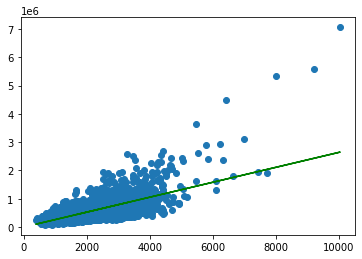

In [11]:
plt.scatter(xcv[:, 1], ycv)
plt.plot(xcv[:, 1], xcv @ theta_results1, color='green')
plt.show()

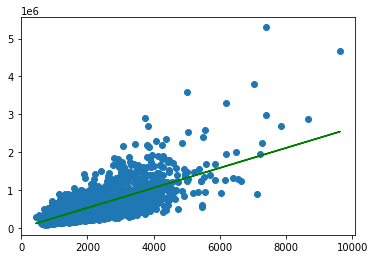

In [12]:
plt.scatter(xtest[:, 1], ytest)
plt.plot(xtest[:, 1], xtest @ theta_results1, color='green')
plt.show()

In [13]:
pol2 = (xtrain[:,1]**2).reshape(len(xtrain),1)
xtrain2 = np.append(xtrain, pol2, axis=1)
pol2 = (xcv[:,1]**2).reshape(len(xcv),1)
xcv2 = np.append(xcv, pol2, axis=1)
pol2 = (xtest[:,1]**2).reshape(len(xtest),1)
xtest2 = np.append(xcv, pol2, axis=1)

In [14]:
random_theta = np.random.rand(3,1)
random_theta

array([[0.14047532],
       [0.20324729],
       [0.01821889]])

In [15]:
theta_results2, costs2, thetas2 = gradient_descent_cost(xtrain2, ytrain, random_theta, linear_function_cost, linear_gradient_cost, learning_rate=0.00000000000000001, threshold=0.01, max_iter=3000)
theta_results2

array([[0.14047533],
       [0.20326609],
       [0.06493771]])

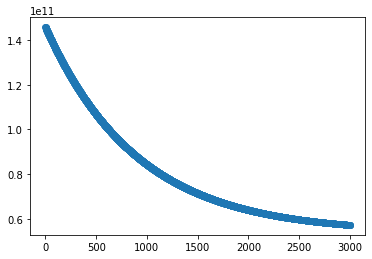

In [16]:
xrow = np.arange(0,3000,1).reshape(-1,1)
plt.scatter(xrow, costs2)
plt.show()

Analizamos la función de costo, ya que no queremos que se aprenda el training set. Se necesita un balance para tener un buen training pero a la vez, sea generalizable el modelo. Por lo mismo vamos a escoger los valores thetas de la iteración 1000.

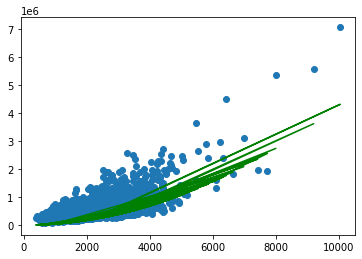

In [58]:
plt.scatter(xcv2[:, 1], ycv)
plt.plot(xcv2[:, 1], xcv2 @ thetas2[1000], color='green')
plt.show()

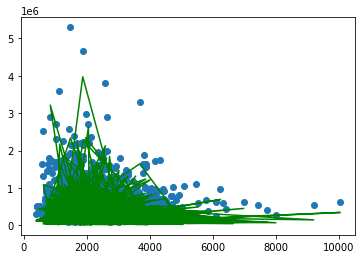

In [63]:
plt.scatter(xtest2[:, 1], ytest)
plt.plot(xtest2[:, 1], xtest2 @ thetas2[1000], color='green')
plt.show()

# Polinomio 3

In [19]:
random_theta = np.random.rand(4,1)
random_theta

array([[0.84826295],
       [0.4238046 ],
       [0.1085941 ],
       [0.70112076]])

In [20]:
pol3 = (xtrain[:,1]**3).reshape(len(xtrain),1)
xtrain3 = np.append(xtrain2, pol3, axis=1)
pol3 = (xcv[:,1]**3).reshape(len(xcv),1)
xcv3 = np.append(xcv2, pol3, axis=1)
pol3 = (xtest[:,1]**3).reshape(len(xtest),1)
xtest3 = np.append(xcv2, pol3, axis=1)

In [52]:
theta_results3, costs3, thetas3 = gradient_descent_cost(xtrain3, ytrain, random_theta, linear_function_cost, linear_gradient_cost, learning_rate=0.000000000000000000000001, threshold=2, max_iter=3000)
theta_results3

array([[0.84826295],
       [0.42380457],
       [0.1084823 ],
       [0.0059002 ]])

Los coeficientes ya se vuelven demasiado pequeños, por lo que no es recomendable seguir aumentando polinomios

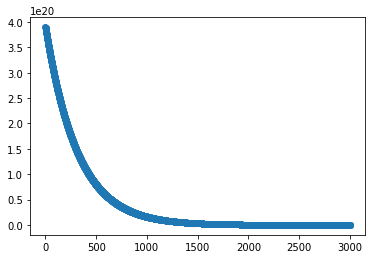

In [53]:
xrow = np.arange(0,3000,1).reshape(-1,1)
plt.scatter(xrow, costs3)
plt.show()

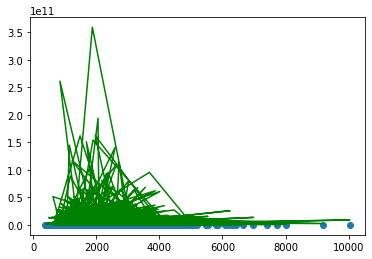

In [55]:
plt.scatter(xtest3[:, 1], ytest)
plt.plot(xtest3[:, 1], xtest3 @ thetas3[350], color='green')
plt.show()

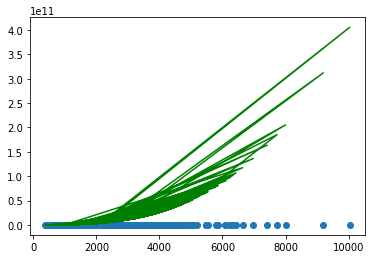

In [57]:
plt.scatter(xcv3[:, 1], ycv)
plt.plot(xcv3[:, 1], xcv3 @ thetas3[350], color='green')
plt.show()

# Conclusiones
Vemos que agregar más polinomios al modelo no lo mejora, por lo que la regresión lineal inicial o la de grado 2 son las más apropiadas para describir el modelo. Pudimos observar como el último coeficiente de theta en la regresión polinomial de grado 3 era un número casi insignificativo. Como vimos en clase, cuando se observa que los coeficientes se vuelven más pequeños es que indica que el modelo probablemente ya no sea necesario de analizarlo en un polinomio más alto. En el modelo de polinomio 3 tuvimos que reducir bastante el parámetro de learning rate para que la función lograra converger. 